## Clustering

Before implementing a complex Graph Neural Network (GNN) for unsupervised clustering, I want to clarify the problem, as the current research proposal seems vague. This step will help me understand our current leads and establish solid baselines. I aim for this research to be reproducible and fully open-sourced, facilitating easy use of our codebase and baselines by other researchers trying different methods.

### Settings

1. **Chunk Definition:**
   - A Chunk is a of 100 words.
   - For a book with 160 words, it will be split into: 1 chunk of 100 words each, plus 1 sentence of 60 words.

2. **Data Source:**
   - Using non-biblical Hebrew Qumran scrolls (383 books).

3. **Composition Labels:**
   - A composition is a label consisting of several books together.
   - For example, books 11Q20 and 11Q19 are from the Temple Scroll composition.
   - We currently have 25 unique compositions over 98 books.

4. **Clustering Methodology:**
   - **Step 1:** Convert each book into sentences.
   - **Step 2:** Vectorize the text (using n-grams, TF-IDF, Word2Vec, BERT, etc.).
   - **Step 3:** Clustering:
     - **Unsupervised Clustering:** 
       - Hierarchical Clustering
   - **Step 4:** Evaluation:
     - **Unsupervised Evaluation:** Metrics from [Cluster Analysis: Evaluation and Assessment](https://en.wikipedia.org/wiki/Cluster_analysis#Evaluation_and_assessment).
       - Examples: [Rand Index](https://en.wikipedia.org/wiki/Rand_index), [Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering)), [Calinski-Harabasz Index](https://en.wikipedia.org/wiki/Calinski%E2%80%93Harabasz_index), etc.
       - The main objective will be the dasgupta score.

### Consideration for Supervised Clustering

- **Question:** Should we also perform supervised clustering?
  - **Labels:** Could be book or composition.
  - **Benefit:** This step could enhance confidence in our unsupervised methods.

### Clustering Objectives
We can explore various clustering strategies:

1. **Clustering by Chunk:**
   - Cluster chunks across all scrolls, when we wish to have chunks from the same composition together, and chunks that are close in the scrolls, also close together.

2. **Clustering by Composition:**
   - Cluster chunks to ensure they belong to the correct composition.

3. **Clustering within a Book:**
   - Cluster chunks to group those that are textually close within each book (as proposed in the research proposal).

4. **Clustering of Serech Hayahad:**
   - Focus specifically on clustering within the Serech Hayahad text.

5. **Temple Scroll Clustering:**
   - Differentiate between sectarian and non-sectarian content within the Temple Scroll.


### Reading list
1. [Document Embedding Techniques](https://towardsdatascience.com/document-embedding-techniques-fed3e7a6a25d)
2. Mining text data - book
3. [clustering-sentence-embeddings-to-identify-intents-in-short-text - PRACTICAL](https://towardsdatascience.com/clustering-sentence-embeddings-to-identify-intents-in-short-text-48d22d3bf02e)
4. [Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/abs/1908.10084)
5. [Open Intent Discovery through Unsupervised
Semantic Clustering and Dependency Parsing](https://arxiv.org/pdf/2104.12114)
6. [Is Everything in Order? A Simple Way to Order Sentences](https://aclanthology.org/2021.emnlp-main.841.pdf)
7. [The performance of BERT as data representation of text clustering](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-022-00564-9)
8. [Understanding and explaining Delta measures for authorship attribution](https://academic.oup.com/dsh/article/32/suppl_2/ii4/3865676)

Word ordering:
1. [Word Ordering as Unsupervised Learning
Towards Syntactically Plausible Word Representations](https://aclanthology.org/I17-1008.pdf)
2. [UNSUPERVISED ORDER LEARNING](https://openreview.net/pdf?id=1CK45cqkEh)
3. [Graph based Neural Sentence Ordering](https://github.com/DeepLearnXMU/NSEG)
4. [Graph based Neural Sentence Ordering](https://arxiv.org/pdf/1611.02654v2)
5. [A New Sentence Ordering Method Using BERT
Pretrained Model](https://arxiv.org/pdf/2108.11994)
6. https://openreview.net/pdf?id=S1AG8zYeg

Surveys:
1. [Short Text Clustering Algorithms, Application and Challenges: A Survey](https://www.mdpi.com/2076-3417/13/1/342)
2. [Incremental hierarchical text clustering methods: a review](https://arxiv.org/html/2312.07769v1)
3. [A comprehensive survey of clustering algorithms: State-of-the-art machine learning applications, taxonomy, challenges, and future research prospects](https://www.sciencedirect.com/science/article/pii/S095219762200046X)
4. [A Systematic Literature Review on Identifying Patterns Using Unsupervised Clustering Algorithms: A Data Mining Perspective](https://www.mdpi.com/2073-8994/15/9/1679)
5. [Constrained Clustering: Current and New Trends](https://link.springer.com/chapter/10.1007/978-3-030-06167-8_14) - offline

Clustering:
1. [Evaluation of Hierarchical Clustering Algorithms for
Document Datasets∗](https://dl.acm.org/doi/pdf/10.1145/584792.584877)
2. [An Objective for Hierarchical Clustering in Euclidean Space and its Connection to
Bisecting K-means∗](https://arxiv.org/pdf/2008.13235)
3. [Hierarchical Clustering: Objective Functions and Algorithms](https://arxiv.org/pdf/1704.02147)
4. [Evaluation Metrics for Unsupervised Learning
Algorithms](https://arxiv.org/pdf/1905.05667)

Stylometry:
1. [https://pan.webis.de/organization.html](PAN - organiztion fot text forensics)
2. [Surveying Stylometry Techniques and Applications](https://dl.acm.org/doi/10.1145/3132039)
3. Advanced Models for Stylometric Applications - offline
4. [A review on authorship attribution in text mining
](https://wires.onlinelibrary.wiley.com/doi/abs/10.1002/wics.1584)


Graphs:
1. [Graph Embedding Techniques, Applications, and Performance: A Survey](https://arxiv.org/pdf/1705.02801)


TODO:
1. Reading:
    2. EOSL - page 485(504) - unsupervised learning.
    3. Dasgupta - https://arxiv.org/pdf/1510.05043 

In [1]:

import pandas as pd

from config import BASE_DIR

RERUN = True

In [2]:


clustering_label = "composition"
CHUNK_SIZE = 100
DATA_PATH = f"{BASE_DIR}/notebooks/data/filtered_text_and_starr_features_{CHUNK_SIZE}_words_nonbib_17_06_2024.csv"
df = pd.read_csv(DATA_PATH)
df_grouped = df.groupby("book")["text"].apply(' '.join).reset_index()
book_info = df[["book", "composition", "section", "text_lex"]].drop_duplicates()
df_by_book = pd.merge(df_grouped, book_info, on="book", how="inner").drop_duplicates(["book"])

df_by_book_non_nulls = df_by_book[~(df_by_book[clustering_label].isna())]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 25 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   book                                                                1365 non-null   object 
 1   sentence_path                                                       1365 non-null   object 
 2   text_lex                                                            1362 non-null   object 
 3   text                                                                1365 non-null   object 
 4   n_words_lex                                                         1365 non-null   int64  
 5   n_words                                                             1365 non-null   int64  
 6   construct to absolute nouns ratio                                   1365 non-null   float64
 7   construct nouns

In [4]:
df["book"].unique()

array(['CD', '1QS', '1QSa', '1QSb', '1QpHab', '1QM', '1QHa', '1Q22',
       '3Q15', '4Q158', '4Q161', '4Q163', '4Q169', '4Q171', '4Q174',
       '4Q176', '4Q177', '4Q200', '4Q216', '4Q219', '4Q221', '4Q223_224',
       '4Q249z', '4Q251', '4Q252', '4Q256', '4Q257', '4Q258', '4Q259',
       '4Q265', '4Q266', '4Q267', '4Q269', '4Q270', '4Q271', '4Q274',
       '4Q286', '4Q299', '4Q317', '4Q319', '4Q320', '4Q321', '4Q321a',
       '4Q364', '4Q365', '4Q365a', '4Q366', '4Q367', '4Q368', '4Q372',
       '4Q378', '4Q379', '4Q381', '4Q382', '4Q385a', '4Q387', '4Q391',
       '4Q394', '4Q397', '4Q400', '4Q403', '4Q405', '4Q415', '4Q416',
       '4Q417', '4Q418', '4Q422', '4Q423', '4Q427', '4Q428', '4Q429',
       '4Q432', '4Q434', '4Q491', '4Q496', '4Q502', '4Q503', '4Q504',
       '4Q509', '4Q511', '4Q512', '4Q522', '4Q524', '4Q525', '11Q11',
       '11Q12', '11Q13', '11Q17', '11Q19', '11Q20'], dtype=object)

Our dataset contains chunks of 100 words (using scrolls that have more than 300 words and written in hebrew).
I will use 4 different vectorizers: Starr, trigrams, BERT, tf-idf. When our metric for clustering will be the dgapusta score.

## Functions

In [6]:
# def run_clustering_cv(df, frac, num_cvs, context_similiarity_window, vectorizers, linkage_method):
#     scores = []
#     for i in tqdm(range(num_cvs)):
#         # Sample 90% of the data
#         sampled_df = stratified_sample(df, 'book', frac=frac, random_state=42 + i)
#         print(f"{datetime.now()} - {sampled_df.shape=}")
#         adjacency_matrix = create_adjacency_matrix(sampled_df, context_similiarity_window=context_similiarity_window,
#                                                    composition_level=True)
# 
#         for vectorizer_type in tqdm(vectorizers):
#             vectorizer_matrix = vectorize_text(sampled_df, "text", vectorizer_type)
#             print(f"{datetime.now()} - {vectorizer_type=},{vectorizer_matrix.shape=}")
# 
#             dasgupta_score, linkage_matrix = get_clusters_scores(sampled_df, "sentence_path", vectorizer_matrix,
#                                                                  linkage_method, adjacency_matrix, plot=False,
#                                                                  metadata={"vectorizer_type": vectorizer_type})
#             dasgupta_score_rand = get_random_clusters_score(sampled_df, "sentence_path", vectorizer_matrix, "ward",
#                                                             iters=2)
#             print(f"{dasgupta_score=}, {dasgupta_score_rand=}\n")
# 
#             feature_order = get_dendrogram_feature_order(linkage_matrix, df["sentence_path"].to_list())
#             _, LCA_metric_mean, LCA_metric_std = get_metrics_from_LCA(feature_order)
# 
#             scores.append({"vectorizer": vectorizer_type, "dasgupta_score": dasgupta_score,
#                            "dasgupta_score_rand": dasgupta_score_rand, "max_dist_metric_mean": LCA_metric_mean,
#                            "cv": i})
# 
#     # Convert scores to a DataFrame for easier analysis
#     scores_df = pd.DataFrame(scores)
#     return scores_df
# 


## Hirerchial clustering baseline with different vectorizers

In [7]:
# import random
# def set_seed_globaly(seed=42):
#     #Set seeds
#     np.random.seed(seed)
#     random.seed(seed)
#     torch.manual_seed(seed)
#     if torch.cuda.is_available():
#         torch.cuda.manual_seed(seed)
#         torch.cuda.manual_seed_all(seed)
#     torch.backends.cudnn.deterministic = True
#     torch.backends.cudnn.benchmark = False
# 
#     

  0%|          | 0/2 [00:00<?, ?it/s]

2024-06-19 08:50:35.704017 - sampled_df.shape=(58, 26)


Building adjacency matrix:   0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/58 [00:00<?, ?it/s]

2024-06-19 08:50:41.859217 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(58, 768)
2024-06-19 08:50:41.859504 - fitting AgglomerativeClustering
2024-06-19 08:50:41.862464 - getting linkage matrix
2024-06-19 08:50:41.862617 - calculate_dasgupta_score
2024-06-19 08:50:41.864502 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.579244047263475, dasgupta_score_rand=0.32955232909860865


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream

bert:   0%|          | 0/58 [00:00<?, ?it/s]

2024-06-19 08:50:48.141234 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(58, 768)
2024-06-19 08:50:48.141402 - fitting AgglomerativeClustering
2024-06-19 08:50:48.142741 - getting linkage matrix
2024-06-19 08:50:48.142849 - calculate_dasgupta_score
2024-06-19 08:50:48.144052 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5779177873651724, dasgupta_score_rand=0.29310344827586216


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/58 [00:00<?, ?it/s]

2024-06-19 08:50:49.805357 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(58, 312)
2024-06-19 08:50:49.805524 - fitting AgglomerativeClustering
2024-06-19 08:50:49.806645 - getting linkage matrix
2024-06-19 08:50:49.806781 - calculate_dasgupta_score
2024-06-19 08:50:49.808005 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7019230878564728, dasgupta_score_rand=0.3582879612825166


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/58 [00:00<?, ?it/s]

2024-06-19 08:51:08.697617 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(58, 1024)
2024-06-19 08:51:08.697817 - fitting AgglomerativeClustering
2024-06-19 08:51:08.699564 - getting linkage matrix
2024-06-19 08:51:08.699704 - calculate_dasgupta_score
2024-06-19 08:51:08.701292 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6432360873565793, dasgupta_score_rand=0.36645493042952215


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/58 [00:00<?, ?it/s]

2024-06-19 08:51:14.604180 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(58, 768)
2024-06-19 08:51:14.604370 - fitting AgglomerativeClustering
2024-06-19 08:51:14.605824 - getting linkage matrix
2024-06-19 08:51:14.605963 - calculate_dasgupta_score
2024-06-19 08:51:14.607470 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5901856914244722, dasgupta_score_rand=0.27616454930429535

2024-06-19 08:51:14.655246 - vectorizer_type='tfidf',vectorizer_matrix.shape=(58, 2089)
2024-06-19 08:51:14.655764 - fitting AgglomerativeClustering
2024-06-19 08:51:14.659388 - getting linkage matrix
2024-06-19 08:51:14.659587 - calculate_dasgupta_score
2024-06-19 08:51:14.661235 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.506962882805979, dasgupta_score_rand=0.3136721113127646

2024-06-19 08:51:14.715500 - vectorizer_type='trigram',vectorizer_matrix.shape=(58, 3269)
2024-06-19 08:51:14.715787 - fitting AgglomerativeClustering
2024-06-19 08:51:14.718981 - getting linkage matrix
2024-06-19 08:51:14.719128 - calculate_dasgupta_score
2024-06-19 08:51:14.720768 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.4214191193654563, dasgupta_score_rand=0.32456140350877194

2024-06-19 08:51:14.760142 - vectorizer_type='starr',vectorizer_matrix.shape=(58, 16)
2024-06-19 08:51:14.760227 - fitting AgglomerativeClustering
2024-06-19 08:51:14.761013 - getting linkage matrix
2024-06-19 08:51:14.761254 - calculate_dasgupta_score
2024-06-19 08:51:14.763170 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5394562503143947, dasgupta_score_rand=0.2923472474289171
2024-06-19 08:51:14.864624 - sampled_df.shape=(58, 26)


Building adjacency matrix:   0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/58 [00:00<?, ?it/s]

2024-06-19 08:51:20.411096 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(58, 768)
2024-06-19 08:51:20.411362 - fitting AgglomerativeClustering
2024-06-19 08:51:20.412840 - getting linkage matrix
2024-06-19 08:51:20.413022 - calculate_dasgupta_score
2024-06-19 08:51:20.414593 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.33228840125391845, dasgupta_score_rand=0.29249848759830616


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/58 [00:00<?, ?it/s]

2024-06-19 08:51:25.688974 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(58, 768)
2024-06-19 08:51:25.689192 - fitting AgglomerativeClustering
2024-06-19 08:51:25.690962 - getting linkage matrix
2024-06-19 08:51:25.691100 - calculate_dasgupta_score
2024-06-19 08:51:25.692610 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.34378265412748166, dasgupta_score_rand=0.3042952208106474


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/58 [00:00<?, ?it/s]

2024-06-19 08:51:27.111834 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(58, 312)
2024-06-19 08:51:27.112016 - fitting AgglomerativeClustering
2024-06-19 08:51:27.113061 - getting linkage matrix
2024-06-19 08:51:27.113175 - calculate_dasgupta_score
2024-06-19 08:51:27.114443 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.3704284221525601, dasgupta_score_rand=0.3573805202661827


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/58 [00:00<?, ?it/s]

2024-06-19 08:51:48.242776 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(58, 1024)
2024-06-19 08:51:48.243048 - fitting AgglomerativeClustering
2024-06-19 08:51:48.257889 - getting linkage matrix
2024-06-19 08:51:48.258083 - calculate_dasgupta_score
2024-06-19 08:51:48.260070 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.29832810867293624, dasgupta_score_rand=0.33106473079249854


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/58 [00:00<?, ?it/s]

2024-06-19 08:51:56.380651 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(58, 768)
2024-06-19 08:51:56.380879 - fitting AgglomerativeClustering
2024-06-19 08:51:56.390313 - getting linkage matrix
2024-06-19 08:51:56.390507 - calculate_dasgupta_score
2024-06-19 08:51:56.392551 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.3244514106583072, dasgupta_score_rand=0.3120084694494858

2024-06-19 08:51:56.447734 - vectorizer_type='tfidf',vectorizer_matrix.shape=(58, 1766)
2024-06-19 08:51:56.448315 - fitting AgglomerativeClustering
2024-06-19 08:51:56.451593 - getting linkage matrix
2024-06-19 08:51:56.451911 - calculate_dasgupta_score
2024-06-19 08:51:56.456266 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.4247648902821317, dasgupta_score_rand=0.3339382940108893

2024-06-19 08:51:56.536854 - vectorizer_type='trigram',vectorizer_matrix.shape=(58, 3024)
2024-06-19 08:51:56.537215 - fitting AgglomerativeClustering
2024-06-19 08:51:56.541663 - getting linkage matrix
2024-06-19 08:51:56.541858 - calculate_dasgupta_score
2024-06-19 08:51:56.552667 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.2173458725182862, dasgupta_score_rand=0.3253176043557169

2024-06-19 08:51:56.608883 - vectorizer_type='starr',vectorizer_matrix.shape=(58, 16)
2024-06-19 08:51:56.609128 - fitting AgglomerativeClustering
2024-06-19 08:51:56.609994 - getting linkage matrix
2024-06-19 08:51:56.610185 - calculate_dasgupta_score
2024-06-19 08:51:56.612415 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.17868338557993724, dasgupta_score_rand=0.3604053236539625


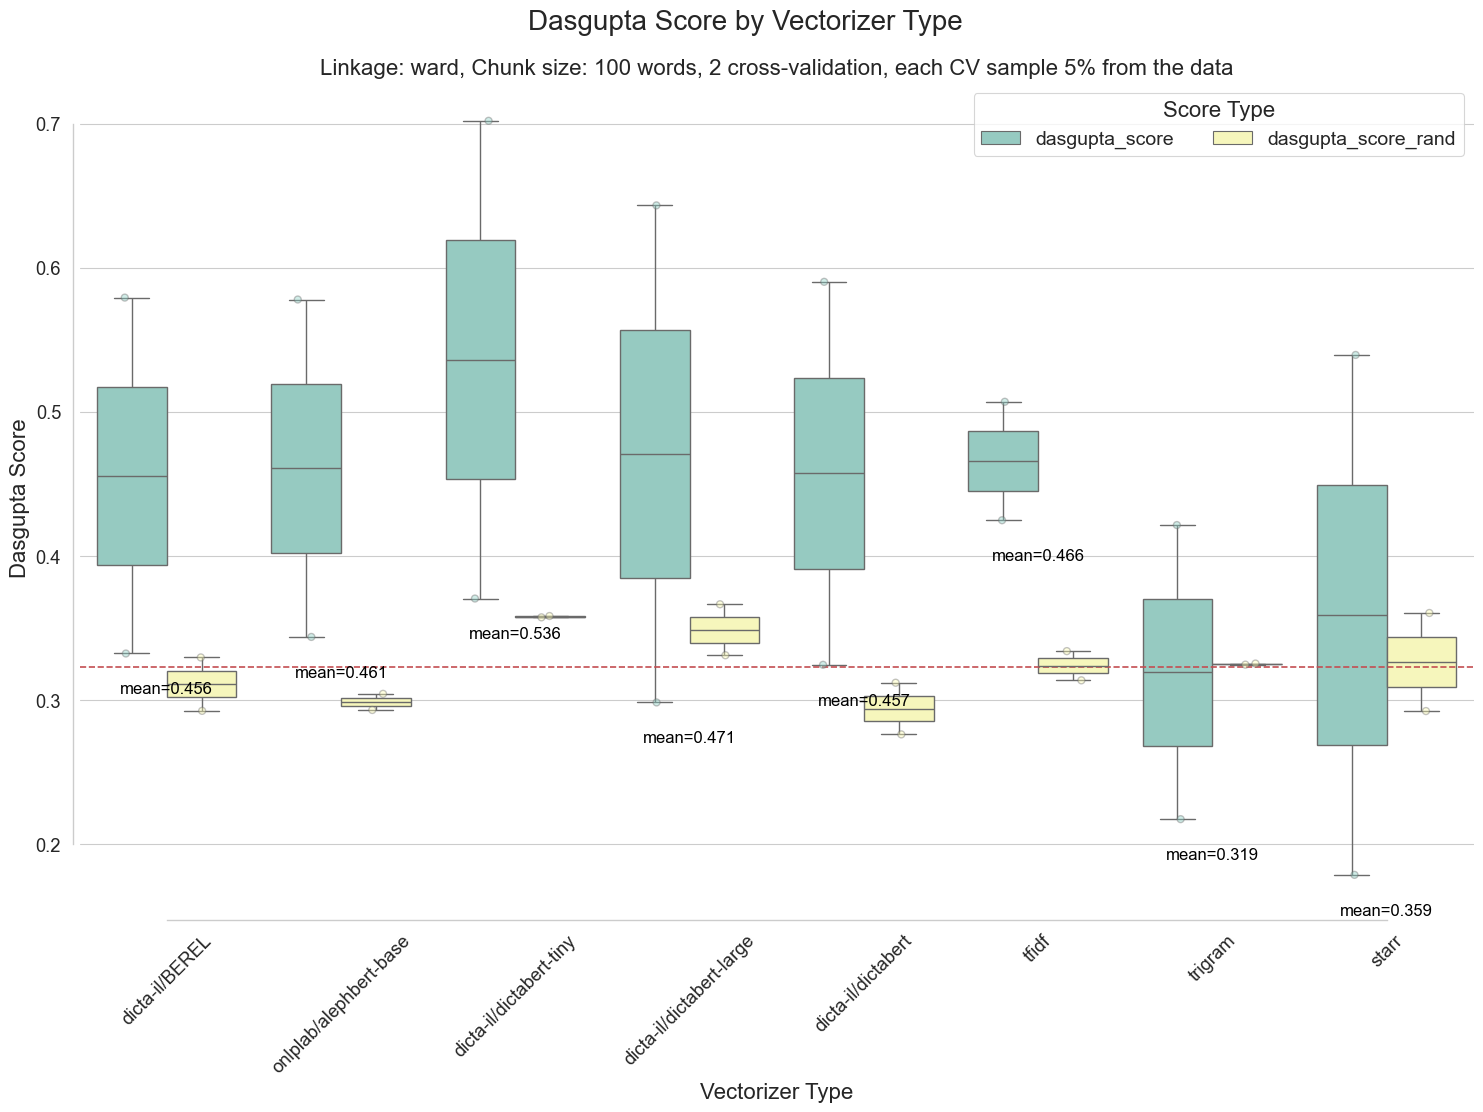

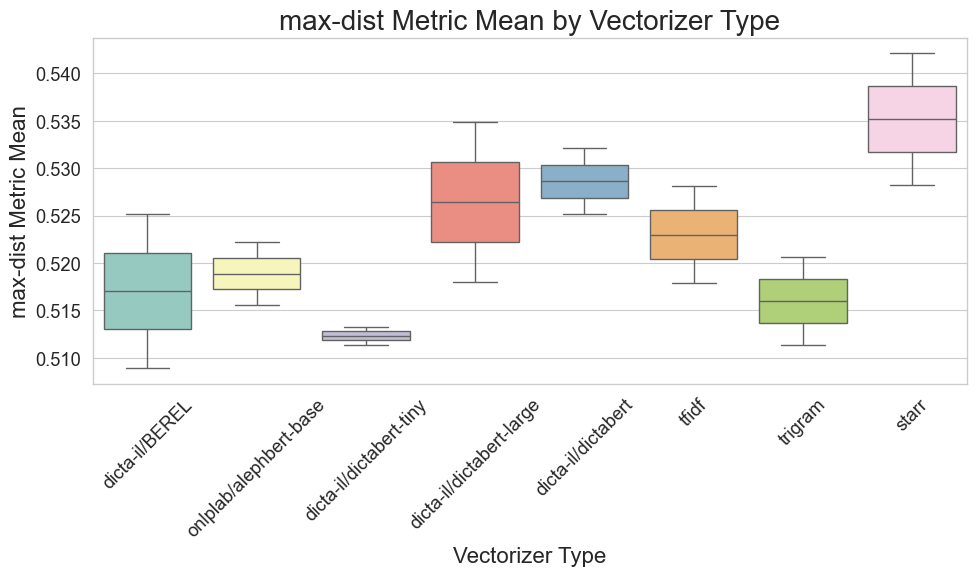

In [8]:
from notebooks.plots_utils import create_dasgupta_score_plot
from notebooks.plots_utils import create_lca_metric_boxplot
from notebooks.clustering_main import run_clustering_cv
from notebooks.constants import BERT_MODELS
from notebooks.notebooks_utils import set_seed_globaly

set_seed_globaly()

PATH = f"{BASE_DIR}/notebooks/data/test"
NUM_CVS = 2
FRAC = 0.05
CONTEXT_SIMILIARITY_WINDOW = 3
vectorizers = BERT_MODELS + ['tfidf', 'trigram', 'starr']
linkage_method = "ward"
file_name = 'dasgupta_scores_window_{}_composition_frac_{}_linkage_{}'.format(CONTEXT_SIMILIARITY_WINDOW,
                                                                              str(FRAC).replace(".", "_"),
                                                                              linkage_method)
if RERUN:
    scores_df = run_clustering_cv(df, FRAC, NUM_CVS, CONTEXT_SIMILIARITY_WINDOW, vectorizers, linkage_method)
    scores_df.to_csv(f"{PATH}/{file_name}.csv", index=False)
else:
    scores_df = pd.read_csv(f"{PATH}/{file_name}.csv")

create_dasgupta_score_plot(scores_df, CHUNK_SIZE, NUM_CVS, FRAC, linkage_method, f"{PATH}/{file_name}",
                           show_p_val=False,
                           p_val_random_test=False, show_mean_scores=True)

create_lca_metric_boxplot(scores_df, f"{PATH}/{file_name}_max_dist")

In [15]:
DATA_PATH = f"{BASE_DIR}/notebooks/data/filtered_text_and_starr_features_{CHUNK_SIZE}_words_nonbib_17_06_2024.csv"
df = pd.read_csv(DATA_PATH)
DATA_PATH = f"{BASE_DIR}/notebooks/data/text_and_starr_features_{CHUNK_SIZE}_words_nonbib_17_06_2024.csv"
df_all = pd.read_csv(DATA_PATH)
df_all

,book,sentence_path,text_lex,text,n_words_lex,n_words,construct to absolute nouns ratio,construct nouns and adjectives percentage,noun to verb ratio,definite_article_percentage,...,preterite percentage,ky percentage,aCr percentage,oM percentage,kya percentage,all conjunctions percentage,non-finite to finite verbs ratio,passive verb forms percentage,total word count,bib
0,CD,CD:1:1-1:12,שמע כל ידע צדק בין מעשה אל ריב ל כל בשר משפט ע...,ועתה שמעו כל יודעי צדק ובינו במעשי אל כי ריב ל...,82,92,0.666667,0.110092,2.250000,0.917431,...,6.422018,0.0,0.0,0.0,0.0,21.100917,0.333333,0.000000,109.0,nonbib
1,CD,CD:1:12-2:1,אחרון עשה דור אחרון עדה בגד הם סור דרך היא עת ...,אחרונים את אשר עשה בדור אחרון בעדת בוגדים הם ס...,85,96,0.545455,0.114286,1.241379,4.761905,...,9.523810,0.0,0.0,0.0,0.0,14.285714,0.705882,0.000000,105.0,nonbib
2,CD,CD:2:1-2:10,כל המון מעשה נדה פנה שמע אל כל בוא ברית גלה אז...,את כל המונם ומעשיהם לנדה לפניו ועתה שמעו אלי כ...,79,94,0.481481,0.130841,2.222222,0.934579,...,2.803738,0.0,0.0,0.0,0.0,17.757009,0.800000,1.869159,107.0,nonbib
3,CD,CD:2:10-2:20,כל שנה עולם כל קום ל קריא שם יתר פליטה ארץ מלא...,לכל שני עולם ובכולם הקים לו קריאי שם למען התיר...,79,94,1.250000,0.205607,1.714286,0.934579,...,0.000000,0.0,0.0,0.0,0.0,17.757009,0.615385,1.869159,107.0,nonbib
4,CD,CD:2:20-3:8,בשר היה חרבה גוע היה היה עשה רצון שמר מצוה עשה...,בשר אשר היה בחרבה כי גוע ויהיו כלא היו בעשותם ...,81,95,1.100000,0.103774,1.000000,1.886792,...,9.433962,0.0,0.0,0.0,0.0,18.867925,0.217391,6.603774,106.0,nonbib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,Arugleviticus,Arugleviticus:fB+Cii:14-fB+Cii:16,מות נכה נפש בהמה שלם נפש תחת נפש,יומת ומכה נפש בהמה ישלמנה נפש תחת נפש,9,9,0.500000,0.083333,2.500000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,8.333333,1.000000,8.333333,12.0,bib
4446,Xjoshua,Xjoshua:1:1-2:9,צוה חזק אמץ ערץ חתת עם יהוה אלהים כל הלך צוה י...,הלוא צויתיך חזק ואמץ אל תערץ ואל תחת כי עמך יה...,62,78,1.333333,0.044944,1.045455,13.483146,...,3.370787,0.0,0.0,0.0,0.0,15.730337,0.466667,1.123596,89.0,bib
4447,Xjudges,Xjudges:f1:1-f3_7i:5,הלך יהודה כנעני ישב חברון שם חברון פנה קרית אר...,וילך יהודה אל הכנעני הישב בחברון ושם חברון לפנ...,80,93,-1.000000,0.074074,1.791667,7.407407,...,12.037037,0.0,0.0,0.0,0.0,23.148148,0.200000,0.000000,108.0,bib
4448,Xjudges,Xjudges:f3_7i:5-f3_7ii:1,משך הר תבור לקח עם עשרה אלף איש בן נפתלי בן זב...,ומשכת בהר תבור ולקחת עמך עשרת אלפים איש מבני נ...,42,54,6.000000,0.093750,1.333333,1.562500,...,3.125000,0.0,0.0,0.0,0.0,21.875000,0.090909,0.000000,64.0,bib


In [28]:
ss = df_all[df_all["bib"]=="nonbib"].groupby("book")["total word count"].sum().to_frame()
ss["more_than_300_word"] = ss["total word count"]>300
ss.sort_values(by="total word count").to_csv(f"{BASE_DIR}/notebooks/data/scrolls_by_word_count.csv")